02,04 chapter에서 다룬 내용과 대부분 겹치므로 간단하게 정리하였음

## Table of Contents
### 1. Loading and Normalizing the CIFAR 10 dataset
### 2. Define a CNN
### 3. Define a loss function
### 4. Train the network on the training data
### 5. Test  the network on the test data

---
## Loading and Normalizing CIFAR 10

``torchvision``을 이용하여 dataset을 불러온다

### ``torchvision.transforms``

``torchvision.transforms``은 ``PIL image``혹은 ``Tensor image``를 Input으로 받는다. 

#### ``transforms``의 method

* ``.ToTensor()``: PIL image / numpy.ndarray를 Tensor로 바꾼다.
* ``.Normalize(mean, std)``: input으로 들어온 tensor image를 주어진 mean & std로 normalize한다. 
* ``.Compose()``

#### ``transforms.ComPose``
``transforms.Compose``는 말 그대로 여러개의 transforms를 compose한다.

<div class="alert alert-info"><h4>Question</h4><p> transforms.Compose와 torch.nn.Sequential의 차이?
pytorch 공식 문서에서는 
    
    'in order to script the transformations, please use torch.nn.Sequential'
이라고 나와있던데, transformations를 script한다는게 뭐지?</p></div>

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms

transform= transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset= torchvision.datasets.CIFAR10(root='./data', train= True, download= True, transform= transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size= 4,
                                            shuffle= True, num_workers= 2)

testset= torchvision.datasets.CIFAR10(root='./data', train= False, download= True, transform= transform)
testloader= torch.utils.data.DataLoader(testset, batch_size= 4,
                                            shuffle= False, num_workers= 2)

classes= ('plane', 'car', 'bird', 'cat', 'dear',
             'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


check data

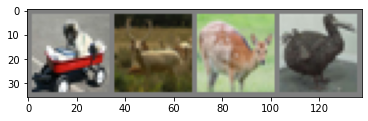

  dog  dear  dear  bird


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img= img/2 + 0.5
    npimg= img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter= iter(trainloader)
images, labels= dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(" ".join('%5s' % classes[labels[j]] for j in range(4)))

## Define a CNN

**dimension**을 잘 고려하여 model 설계

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1= nn.Conv2d(3, 6, 5)
        self.pool= nn.MaxPool2d(2, 2)
        self.conv2= nn.Conv2d(6, 16, 5)
        self.fc1= nn.Linear(16*5*5, 120)
        self.fc2= nn.Linear(120, 84)
        self.fc3= nn.Linear(84, 10)
        
    def forward(self, x):
        x= self.pool(F.relu(self.conv1(x)))
        x= self.pool(F.relu(self.conv2(x)))
        x= x.view(-1, 16*5*5)
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        
        return x

net= Net()

## Define a Loss Function and Optimizer

In [25]:
import torch.optim as optim

criterion=  nn.CrossEntropyLoss()
optimizer= optim.SGD(net.parameters(), lr= 0.001, momentum= 0.9)

## Train the Network

In [26]:
for epoch in range(2):
    running_loss= 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels= data
        
        optimizer.zero_grad()
        
        outputs= net(inputs)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss+= loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss= 0.0
            
print("Finished Training")

[1,  2000] loss: 2.188
[1,  4000] loss: 1.833
[1,  6000] loss: 1.679
[1,  8000] loss: 1.567
[1, 10000] loss: 1.519
[1, 12000] loss: 1.471
[2,  2000] loss: 1.401
[2,  4000] loss: 1.391
[2,  6000] loss: 1.363
[2,  8000] loss: 1.339
[2, 10000] loss: 1.316
[2, 12000] loss: 1.300
Finished Training


save the model

In [27]:
PATH= './cifar_net.pth'
torch.save(net.state_dict(),  PATH)

##  Test the Network on the Test  Data

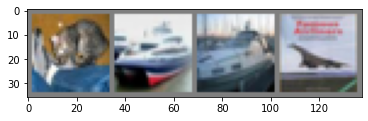

GroundTruth:  horse  dear  frog  ship


In [28]:
dataiter= iter(testloader)
images, lables= dataiter.next()

imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", ' '.join('%5s' % classes[labels[j]] for j in range(4)))

import the model

In [29]:
net= Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [30]:
outputs= net(images)

In [31]:
_, predicted= torch.max(outputs, 1)

print("Predicted: ", ' '.join('%5s'  % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car  ship  ship


In [32]:
outputs

tensor([[-1.6342, -1.2858, -0.0543,  2.2369,  0.2342,  2.0627, -1.2359,  1.2764,
         -0.4782, -1.1769],
        [ 4.1639,  7.1401, -1.7118, -2.4822, -2.8157, -3.5608, -2.9325, -4.4155,
          4.9343,  4.9670],
        [ 2.9744,  2.8445, -0.8664, -1.5860, -0.8823, -2.4429, -2.7403, -1.6330,
          3.0420,  2.9175],
        [ 3.4197,  0.9302, -0.0362, -1.5081, -0.1502, -2.8431, -2.5375, -1.5943,
          3.7902,  1.8352]], grad_fn=<AddmmBackward>)

In [33]:
correct= 0
total= 0

with torch.no_grad():
    for data in testloader:
        images, labels= data
        outputs= net(images)
        _, predicted= torch.max(outputs.data, 1)
        total+=  labels.size(0)
        correct+= (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 51 %


In [34]:
class_correct= list(0. for i in range(10))
class_total= list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels=  data
        outputs= net(images)
        _, predicted= torch.max(outputs, 1)
        c= (predicted == labels).squeeze()
        for i in range(4):
            label= labels[i]
            class_correct[label]+= c[i].item()
            class_total[label]+= 1
            
for i in range(10):
    print('Accuracy of %5s: %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane: 35 %
Accuracy of   car: 57 %
Accuracy of  bird: 23 %
Accuracy of   cat: 36 %
Accuracy of  dear: 52 %
Accuracy of   dog: 46 %
Accuracy of  frog: 47 %
Accuracy of horse: 69 %
Accuracy of  ship: 63 %
Accuracy of truck: 77 %
